In [ ]:
# 평가함수 (classification_report)
# Accuaracy, Recall, Precision, F1 score 값을 계산

from sklearn.metrics import classification_report

# 정답 데이터와 예측 데이터가 있어야 해요!
t_data = [0, 1, 2, 2, 2] # 0 : thin, 1 : normal, 2 : fat
predict = [0, 0, 2, 2, 1] # 우리 모델의 예측값
target_name = ['thin', 'normal', 'fat']
print(classification_report(t_data, predict, target_names=target_name))

              precision    recall  f1-score   support

        thin       0.50      1.00      0.67         1
      normal       0.00      0.00      0.00         1
         fat       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



In [ ]:
# 대표적인 다중분류 문제인 Iris 분류를 구현해 보아요!
# 필요한 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report

In [ ]:
iris = load_iris()
# print(iris.DESCR)
# print(iris.data)
df = pd.DataFrame(iris.data, columns=iris.feature_names)

display(df.head())
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
display(df.head())
# print(iris.target)
df['label'] = iris.target
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# 결측치 확인 - 결측치가 없어요!
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   label         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
label,0


In [ ]:
# 중복데이터 확인
print(df.duplicated().sum()) # 중복행이 없으면 당연히 0이 나와야해요!
# 결과 1 -> 쓸데없이 중복된 데이터가 1개 존재해요!

df_new = df.drop_duplicates()
display(df_new.shape) # (150, 5) -> (149, 5)

1


(149, 5)

In [ ]:
# 4개의 feature가 존재해요!
# 이 4개의 feature가 어느정도는 당연히 종속변수에 영향을 미쳐야 해요!
# 한번 독립변수들이 종속변수에 어느정도 연관성이 있는지 수치로 확인해보아요!
# 상관관계를 분석하면 되요!
print(df.corr())
# 계산된 결과는 우리가 상관계수라고 말하는데
# 이 값은 -1 ~ 1 사이의 실수로 계산되요!
# 1은 양의 상관관계, -1은 음의 상관관계
# 양 극단으로 값이 갈 수록 상관관계가 더 많아요!

              sepal_length  sepal_width  petal_length  petal_width     label
sepal_length      1.000000    -0.117570      0.871754     0.817941  0.782561
sepal_width      -0.117570     1.000000     -0.428440    -0.366126 -0.426658
petal_length      0.871754    -0.428440      1.000000     0.962865  0.949035
petal_width       0.817941    -0.366126      0.962865     1.000000  0.956547
label             0.782561    -0.426658      0.949035     0.956547  1.000000


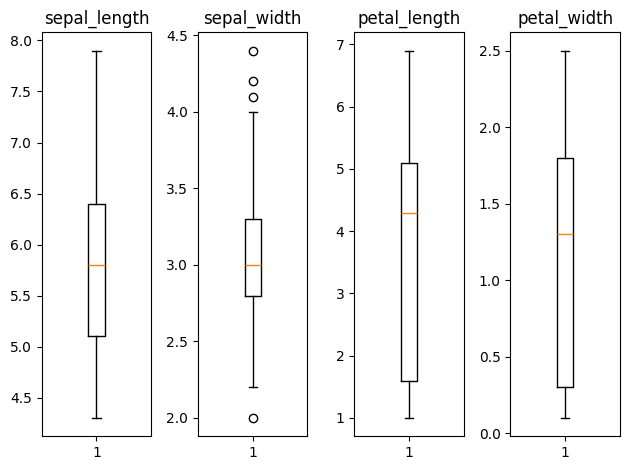

In [ ]:
# 이상치 확인
# 실제 데이터이고 이상치가 범위에서 크게 벗어나지 않으므로 제거 X
fig = plt.figure()
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.set_title('sepal_length')
ax2.set_title('sepal_width')
ax3.set_title('petal_length')
ax4.set_title('petal_width')

ax1.boxplot(df_new['sepal_length'])
ax2.boxplot(df_new['sepal_width'])
ax3.boxplot(df_new['petal_length'])
ax4.boxplot(df_new['petal_width'])

plt.tight_layout()

plt.show()

In [ ]:
# 정규화 처리
x_data = df_new.drop('label', axis=1, inplace=False).values # 2차원
t_data = df_new['label'].values # 1차원

scaler = StandardScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)
# print(x_data_norm) 0 ~ 1 사이 값이 아님 (MInMaxScaler와 다르게)

In [ ]:
# 데이터 분할(평가를 진행해야 해요!)
# 약간 유연성을 좀 가지면서 처리해주세요! (데이터 부족때문에!)
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm, t_data,
                 test_size=0.2, stratify=t_data)

In [ ]:
# sklearn 다중 분류 모델 구현
sklearn_model = linear_model.LogisticRegression()
sklearn_model.fit(x_data_train_norm, t_data_train) # one-hot encoding X 1차원 입력

# 모델 평가
sklearn_result = sklearn_model.predict(x_data_test_norm)
print(sklearn_result)
print(classification_report(t_data_test, sklearn_result,
                            target_names=['Setosa', 'Vesicolor', 'Virsinica']))

[1 0 0 0 2 2 1 1 0 1 0 2 1 0 0 2 1 1 2 0 1 1 0 1 0 2 2 2 1 2]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
   Vesicolor       0.91      1.00      0.95        10
   Virsinica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
# Tensorflow 구현
keras_model = Sequential()

keras_model.add(Flatten(input_shape=(4,)))
keras_model.add(Dense(units=3, activation='softmax'))
# keras_model.summary()

keras_model.compile(optimizer=Adam(learning_rate=1e-1),
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])

es_callback = EarlyStopping(monitor='val_loss', patience=5,
                            restore_best_weights=True, verbose=1)

history = keras_model.fit(x_data_train_norm, t_data_train.reshape(-1, 1),
                          epochs=1000, verbose=1,
                          validation_split=0.2, callbacks=[es_callback])

Epoch 1/1000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - acc: 0.1452 - loss: 1.9283 - val_acc: 0.4583 - val_loss: 1.0312
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - acc: 0.4848 - loss: 0.9117 - val_acc: 0.7917 - val_loss: 0.5981
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - acc: 0.8480 - loss: 0.5207 - val_acc: 0.7917 - val_loss: 0.4725
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - acc: 0.8129 - loss: 0.4492 - val_acc: 0.7917 - val_loss: 0.4044
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - acc: 0.8625 - loss: 0.3637 - val_acc: 0.8333 - val_loss: 0.3608
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - acc: 0.8652 - loss: 0.3300 - val_acc: 0.8333 - val_loss: 0.3343
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - acc: 0.8535 - loss: 0.3057 - val_acc: 0.8333 - val_loss: 0.3164
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - acc: 0.8978 - loss: 0.2479 - val_acc: 0.8750 - val_loss: 0.2966
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - acc: 0.8952 - l

In [ ]:
# 모델 평가
keras_result = keras_model.predict(x_data_test_norm)
# print(keras_result)

# 2차원 확률값을 1차원 label값으로 변경
keras_result = np.argmax(keras_result, axis=1)

print(classification_report(t_data_test, keras_result,
                            target_names=['Setosa', 'Vesicolor', 'Virsinica']))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
   Vesicolor       0.91      1.00      0.95        10
   Virsinica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

